In [1]:
import json
import pandas as pd
import numpy as np


In [126]:
user_item_df = pd.read_csv('/Users/codyyu/Desktop/CMPE 256/steam/data/user_item.csv', index_col=0)
user_review_df = pd.read_csv('/Users/codyyu/Desktop/CMPE 256/steam/data/user_review.csv', index_col=0)
game_df = pd.read_csv('/Users/codyyu/Desktop/CMPE 256/steam/data/steam_games.csv', index_col=0)


In [127]:
user_review_processed_df = pd.read_csv('/Users/codyyu/Desktop/CMPE 256/steam/data/user_reviewdata.csv')


In [3]:
game_df.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.49,http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,0.0,761140.0,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,False,643980.0,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free to Play,False,670290.0,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",0.83,http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,False,767400.0,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"['Action', 'Indie', 'Casual', 'Sports']",1.79,http://steamcommunity.com/app/773570/reviews/?...,"['Single-player', 'Full controller support', '...",2.99,False,773570.0,NaN,NaN,NaN


In [213]:
game_df = game_df[game_df['id'].notna()]

In [214]:
game_df['id']=game_df.id.astype('int32')

/var/folders/zj/cjnnn8695qx8mqcc36hww0y80000gp/T/ipykernel_1745/3987867423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_df['id']=game_df.id.astype('int32')


In [216]:
item_id_game_name_map = {}
for index, row in game_df.iterrows():
    item_id_game_name_map[int(row['id'])] = row['app_name']

In [217]:
item_id_game_name_map

{761140: 'Lost Summoner Kitty',
 643980: 'Ironbound',
 670290: 'Real Pool 3D - Poolians',
 767400: '弹炸人2222',
 773570: 'Log Challenge',
 772540: 'Battle Royale Trainer',
 774276: 'SNOW - All Access Basic Pass',
 774277: 'SNOW - All Access Pro Pass',
 774278: 'SNOW - All Access Legend Pass',
 768800: 'Race',
 768570: 'Uncanny Islands',
 724910: 'Icarus Six Sixty Six',
 770380: 'Army of Tentacles: (Not) A Cthulhu Dating Sim: Black GOAT of the Woods Edition',
 768880: 'Beach Rules',
 765320: 'Planetarium 2 - Zen Odyssey',
 773650: 'The first thrust of God',
 774271: 'SNOW - Starter Pack',
 773690: 'The first thrust of God - All Aircrafts',
 774279: 'SNOW - Lifetime Pack',
 772590: 'After Life VR',
 640250: 'Kitty Hawk',
 768060: 'The Warrior Of Treasures',
 711440: 'Mortars VR',
 775880: 'RC Plane 3 - Canyon Scenario',
 775881: 'RC Plane 3 - F-53B',
 653960: 'DinoBlaster',
 777910: 'Robotpencil Presents: Understanding 3D for Concept',
 282010: 'Carmageddon Max Pack',
 70: 'Half-Life',
 75

In [174]:
user_item_df.head()

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277.0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888.0,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137.0,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328.0,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541.0,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."


In [9]:
all_game_id = game_df['id'].to_list()

In [10]:
seen = set()
uniq = []
for x in all_game_id:
    if x in seen:
        uniq.append(x)
        seen.add(x)

In [11]:
#main_pd = pd.DataFrame(columns=[all_game_id])
#main_pd.insert(0, 'user_steam_id',[])



In [12]:

#main_pd['user_steam_id']=main_pd.user_steam_id.astype('int64')

In [13]:
game_freq_map = {}


for index, row in user_item_df.iterrows():
        game_list = eval(row['items'])
        game_list = json.dumps(game_list)
        game_list = json.loads(game_list)

        for game in game_list:
            game_id = game['item_id']
            if game_id in game_freq_map:
                  game_freq_map[game_id] = game_freq_map[game_id] + 1
            else:
                  game_freq_map[game_id] = 1
            

In [175]:
game_freq_map

{'10': 9735,
 '20': 6334,
 '30': 3465,
 '40': 3274,
 '50': 6289,
 '60': 3309,
 '70': 7750,
 '130': 6206,
 '300': 4978,
 '240': 24220,
 '3830': 3853,
 '2630': 780,
 '3900': 3189,
 '34440': 3189,
 '3920': 2335,
 '6400': 105,
 '6910': 3530,
 '7670': 10272,
 '409710': 10272,
 '220': 18307,
 '320': 15854,
 '340': 19826,
 '360': 13327,
 '380': 13275,
 '400': 18774,
 '420': 13060,
 '9340': 6355,
 '228200': 7816,
 '11450': 2802,
 '7940': 1815,
 '4700': 4020,
 '12900': 4560,
 '13250': 950,
 '16100': 31,
 '15700': 3044,
 '15710': 1434,
 '17330': 1648,
 '17340': 1648,
 '22000': 2621,
 '500': 6585,
 '4560': 7576,
 '17460': 3264,
 '10500': 4263,
 '24740': 7152,
 '22200': 1290,
 '26800': 2706,
 '1250': 14216,
 '35420': 14000,
 '3590': 2635,
 '8880': 834,
 '8890': 785,
 '23120': 242,
 '35700': 3071,
 '10140': 78,
 '35010': 164,
 '35140': 7115,
 '29180': 1112,
 '15520': 512,
 '32370': 5904,
 '37700': 56,
 '6020': 4346,
 '24860': 1415,
 '39530': 844,
 '550': 37044,
 '223530': 37044,
 '8980': 9121,
 '41

In [20]:
#game_freq_map_sorted = sorted(game_freq_map.items(), key=lambda x:x[1], reverse=True)
game_freq_map_sorted = {r: game_freq_map[r] for r in sorted(game_freq_map, key=game_freq_map.get, reverse=True)}
game_freq_map_sorted

{'205790': 49571,
 '730': 43776,
 '4000': 43301,
 '304930': 38682,
 '550': 37044,
 '223530': 37044,
 '105600': 29239,
 '230410': 25807,
 '620': 24465,
 '240': 24220,
 '218620': 23729,
 '72850': 22285,
 '301520': 21785,
 '49520': 21029,
 '218230': 20726,
 '340': 19826,
 '227940': 19721,
 '400': 18774,
 '220': 18307,
 '236390': 18172,
 '333930': 17233,
 '208090': 16489,
 '8190': 16272,
 '252490': 16201,
 '224260': 15979,
 '232210': 15932,
 '219640': 15930,
 '320': 15854,
 '322330': 15571,
 '8930': 15303,
 '24240': 15202,
 '33930': 15084,
 '219540': 15079,
 '55230': 14753,
 '33910': 14644,
 '243870': 14608,
 '1250': 14216,
 '35420': 14000,
 '304050': 13969,
 '222900': 13422,
 '360': 13327,
 '380': 13275,
 '22380': 13131,
 '420': 13060,
 '238960': 12968,
 '219740': 12653,
 '42910': 12239,
 '200210': 12105,
 '8870': 11967,
 '252950': 11605,
 '204360': 11511,
 '113200': 11400,
 '222880': 11368,
 '91310': 11275,
 '43110': 11237,
 '221100': 10923,
 '17410': 10846,
 '291480': 10794,
 '265630': 

In [23]:
most_played_games = {key:value for key, value in game_freq_map_sorted.items() if value > 1000}
len(most_played_games)


1038

In [40]:

#pd.DataFrame([most_played_games.keys()]).T.to_csv('/Users/codyyu/Desktop/CMPE 256/steam/data/most_played_game_id.csv')



In [44]:
users_own_most_played_games = set()

for index, row in user_item_df.iterrows():
    game_list = eval(row['items'])
    game_list = json.dumps(game_list)
    game_list = json.loads(game_list)
    for game in game_list:
        if game['item_id'] in most_played_games:
            users_own_most_played_games.add(row['user_id'])
            break


In [45]:
len(users_own_most_played_games)

70800

In [47]:
len(user_item_df)

88310

In [63]:
main_pd = pd.DataFrame(0, index=np.arange(len(users_own_most_played_games)), columns=[list(most_played_games.keys())])

In [64]:
main_pd.insert(0, 'user_steam_id',list(users_own_most_played_games))

In [82]:
main_pd


,user_steam_id,205790,730,4000,304930,550,223530,105600,230410,620,...,431060,433670,453720,453990,469930,511800,521450,522490,522570,527440
0,labeeb21,0,710,81,19,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chickenshed,0,654,23016,0,3267,0,870,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NutTheSniper,0,67405,333,809,1107,0,3518,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,76561198046730804,0,0,860,0,0,0,2348,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,76561198069511271,0,10286,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70795,jtfgamer,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70796,76561198022460178,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70797,cast_away,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70798,OffpeakGames,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
type(user_item_df[user_item_df['user_id'] == 'chickenshed'].iloc[0]['items'])

str

In [178]:
user_item_processed = pd.DataFrame(columns=['steam_id', 'user_id', 'item_id', 'playtime_forever', 'playtime_2weeks'])

In [179]:
user_item_processed

,steam_id,user_id,item_id,playtime_forever,playtime_2weeks


In [181]:
tmp_list = []
for index, row in user_item_df.iterrows():

    game_list = eval(row['items'])
    game_list = json.dumps(game_list)
    game_list = json.loads(game_list)
    for game in game_list:
        if game['item_id'] in most_played_games.keys():
            tmp_list.append([row['steam_id'], row['user_id'], game['item_id'], game['playtime_forever'], game['playtime_2weeks']] )
            #user_item_processed.loc[len(user_item_processed.index)] = [row['user_id'], game['item_id'], game['playtime_forever'], game['playtime_2weeks']] 


In [182]:
user_item_processed = pd.DataFrame(tmp_list, columns=['steam_id', 'user_id', 'item_id', 'playtime_forever', 'playtime_2weeks'])

In [183]:
#user_item_processed['user_id']=user_item_processed.user_id.astype('int16')
user_item_processed['item_id']=user_item_processed.item_id.astype('int32')
user_item_processed['playtime_forever']=user_item_processed.playtime_forever.astype('int32')
user_item_processed['playtime_2weeks']=user_item_processed.playtime_2weeks.astype('int32')
user_item_processed.dtypes


steam_id             int64
user_id             object
item_id              int32
playtime_forever     int32
playtime_2weeks      int32
dtype: object

In [184]:

#user_review_processed_df['user_id']=user_review_processed_df.user_id.astype('int16')
user_review_processed_df['item_id']=user_review_processed_df.item_id.astype('int32')
user_review_processed_df.dtypes


user_id      object
item_id       int32
recommend      bool
dtype: object

In [135]:
user_review_processed_df[user_review_processed_df['user_id'] == 'js41637']

,user_id,item_id,recommend
3,js41637,251610,True
4,js41637,227300,True
5,js41637,239030,True


In [136]:
user_item_processed[user_item_processed['user_id'] == 'js41637']

,user_id,item_id,playtime_forever,playtime_2weeks
218,js41637,10,0,0
219,js41637,80,0,0
220,js41637,100,0,0
221,js41637,300,220,0
222,js41637,30,0,0
...,...,...,...,...
599,js41637,310380,0,0
600,js41637,4720,0,0
601,js41637,34270,0,0
602,js41637,203750,0,0


In [221]:
df = pd.merge(user_review_processed_df, user_item_processed, on=['user_id', 'item_id'], how='inner')
df

,user_id,item_id,recommend,steam_id,playtime_forever,playtime_2weeks
0,76561197970982479,1250,True,76561197970982479,10006,0
1,76561197970982479,22200,True,76561197970982479,271,0
2,76561197970982479,43110,True,76561197970982479,834,0
3,js41637,227300,True,76561198035864385,551,0
4,js41637,239030,True,76561198035864385,349,0
...,...,...,...,...,...,...
40310,Ghoustik,730,True,76561198308105615,3969,0
40311,76561198312638244,233270,True,76561198312638244,533,0
40312,76561198312638244,130,True,76561198312638244,221,0
40313,76561198312638244,70,True,76561198312638244,1010,0


In [222]:
user_id_map = {}
id_user_map = {}
id = 0
for index, row in df.iterrows():
    if row['user_id'] not in user_id_map:
        user_id_map[row['user_id']] = id
        id_user_map[id] = row['user_id']
        id = id + 1


In [223]:
for index, row in df.iterrows():
    df.at[index, ['id']] = user_id_map[row['user_id']]

In [220]:
import csv
with open('/Users/codyyu/Desktop/CMPE 256/steam/data/user_id_map.csv','w') as f:
    w = csv.writer(f)
    w.writerows(user_id_map.items())
f.close()
with open('/Users/codyyu/Desktop/CMPE 256/steam/data/id_user_map.csv','w') as f:
    w = csv.writer(f)
    w.writerows(id_user_map.items())
f.close()
with open('/Users/codyyu/Desktop/CMPE 256/steam/data/item_id_game_name_map.csv','w') as f:
    w = csv.writer(f)
    w.writerows(item_id_game_name_map.items())
f.close()


In [244]:
df['recommend']=df.recommend.astype('int16')
df['recommend'].value_counts()

1    36187
0     4128
Name: recommend, dtype: int64

In [246]:

m = df['recommend'] == 0

df.loc[m, ['recommend']] = (-1)
df['recommend'].value_counts()

 1    36187
-1     4128
Name: recommend, dtype: int64

In [226]:
df['id']=df.id.astype('int32')

In [247]:
df.to_csv('/Users/codyyu/Desktop/CMPE 256/steam/data/final.csv', index=False)

In [242]:
df['recommend'].value_counts()

True     36187
False     4128
Name: recommend, dtype: int64

<AxesSubplot:ylabel='Frequency'>

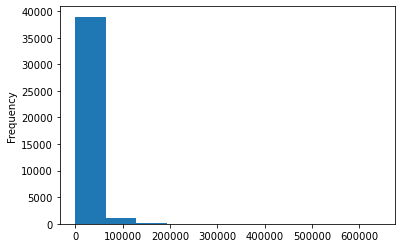

In [248]:
df['playtime_forever'].plot(kind = 'hist')

In [241]:
df[df['playtime_forever'] > 500000]

,user_id,item_id,recommend,steam_id,playtime_forever,playtime_2weeks,id
5989,wolop,4000,True,76561197970687008,642773,7299,2389
13139,76561198039832932,4000,True,76561198039832932,613411,588,5361
15679,tsunamitad,72200,True,76561198019093186,600068,0,6420


In [254]:
sorted(df[df['recommend'] == -1]['playtime_forever'], reverse=True)

[344266,
 303106,
 289102,
 289102,
 289102,
 289102,
 172464,
 165094,
 155997,
 152340,
 146494,
 139893,
 139853,
 136929,
 134644,
 133397,
 127110,
 125162,
 123602,
 120443,
 119824,
 119411,
 117740,
 114370,
 110997,
 110113,
 108498,
 106880,
 103696,
 102767,
 102265,
 101931,
 100157,
 99765,
 98257,
 96102,
 94006,
 93000,
 92803,
 92211,
 92063,
 91598,
 89411,
 86042,
 85837,
 85695,
 85149,
 84139,
 83884,
 83324,
 82903,
 81937,
 81893,
 80595,
 80587,
 80478,
 79486,
 77892,
 76295,
 75739,
 75538,
 74671,
 74521,
 74015,
 73837,
 72656,
 72292,
 72265,
 71719,
 71344,
 70786,
 70653,
 70217,
 70050,
 70016,
 69924,
 68540,
 68451,
 67957,
 67837,
 67701,
 66721,
 66271,
 66096,
 65862,
 65827,
 65164,
 64414,
 63448,
 63435,
 62725,
 62712,
 62712,
 62577,
 61941,
 61681,
 61389,
 61386,
 61367,
 60020,
 58531,
 58121,
 57493,
 56647,
 56422,
 56188,
 56080,
 55788,
 55735,
 55465,
 54494,
 54126,
 53906,
 53736,
 53557,
 53378,
 53150,
 52963,
 52836,
 52664,
 52460,

In [103]:
user_item_processed.to_csv('/Users/codyyu/Desktop/CMPE 256/steam/data/4M.csv')

In [81]:
for index, row in main_pd.iterrows():

    user = user_item_df[user_item_df['user_id'] == row['user_steam_id']].iloc[0] 
    game_list = eval(user['items'])
    game_list = json.dumps(game_list)
    game_list = json.loads(game_list)
    for game in game_list:
        main_pd.at[index,game['item_id']] = game['playtime_forever']

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


KeyboardInterrupt: 

In [ ]:
main_pd

In [ ]:
main_pd.to_csv('/Users/codyyu/Desktop/CMPE 256/steam/data/main.csv')

In [ ]:
from collections import Counter 


In [20]:
all_steam_id = list()
for index, row in user_item_df.iterrows():
    #tmp = pd.Series(0, index=main_pd.columns)
    #tmp['user_steam_id'] = row['steam_id']
    all_steam_id.append(row['steam_id'])

   # main_pd = main_pd.append(tmp, ignore_index=True)


In [ ]:
all_steam_id

In [26]:
main_pd = pd.DataFrame(0, index=np.arange(len(all_steam_id)), columns=[all_game_id])

In [27]:
main_pd.insert(0, 'user_steam_id',all_steam_id)

In [28]:
main_pd.head()

,user_steam_id,761140,643980,670290,767400,773570,772540,774276,774277,774278,...,771810,767590,747320,769330,745400,773640,733530,610660,658870,681550
0,76561197970982479,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,76561198035864385,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,76561198007712555,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,76561197963445855,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,76561198002099482,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
main_pd.to_csv('/Users/codyyu/Desktop/CMPE 256/steam/data/main.csv')

In [30]:
game_freq_map = {}


for index, row in user_item_df.iterrows():
    game_list = eval(row['items'])
    game_list = json.dumps(game_list)
    game_list = json.loads(game_list)



    for game in game_list:

        main_pd.at[index,game['item_id']] = game['playtime_forever']
        

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


In [31]:
main_pd.to_csv('/Users/codyyu/Desktop/CMPE 256/steam/data/main.csv')